<a href="https://colab.research.google.com/github/olgasherbiena/KPI/blob/MMSP/lisagu_figurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Фігура Лісажу першого рангу
#### w1/w2=1

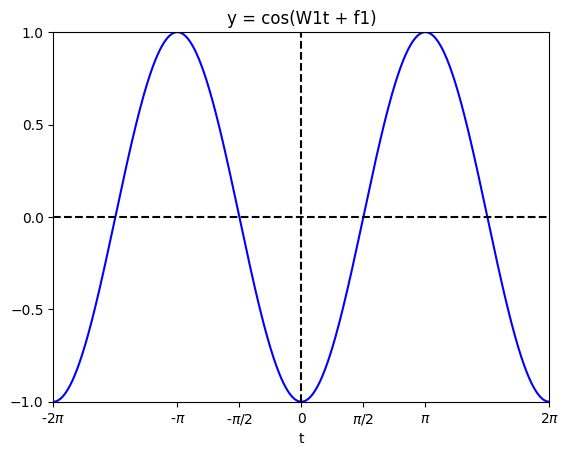

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-2*np.pi, 2*np.pi, 0.01)
wx = 1
wy = 1.01
fx = 1*np.pi/1
fy = 0
x = np.cos(wx*t + fx)
y = np.cos(wy*t + fy)

# перший графік у лівому subplot
plt.plot(t, x, 'b-')
plt.axis([-np.pi, np.pi, -1, 1])
plt.yticks(np.arange(-1, 1.1, 0.5))
plt.xticks([-2*np.pi, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 2*np.pi], [r'-2$\pi$', r'-$\pi$', r'-$\pi/2$', '0', r'$\pi/2$', r'$\pi$', r'$2\pi$'])
plt.title('y = cos(W1t + f1)')
plt.xlabel('t')
plt.plot([-2*np.pi, 2*np.pi], [0, 0], 'k--')
plt.plot([0,0], [-1,1], 'k--')
plt.show()



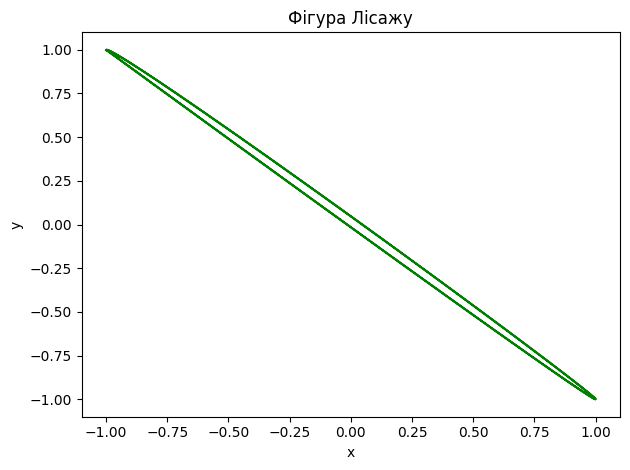

In [ ]:

plt.plot(x, y, 'g-')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Фігура Лісажу')

plt.tight_layout()
plt.show()

# Поліном Чебишева

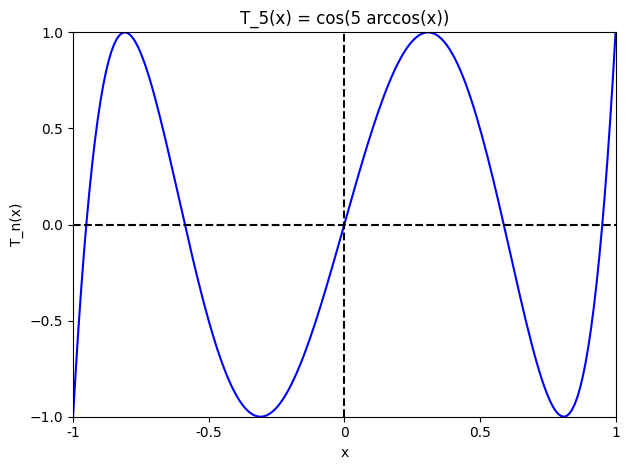

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметри
n = 5  # порядок
x = np.linspace(-1, 1, 200)
T = np.cos(n * np.arccos(x))

plt.plot(x, T, 'b-')
plt.axis([-1, 1, -1, 1])
plt.xticks([-1, -0.5, 0, 0.5, 1], ['-1', '-0.5', '0', '0.5', '1'])
plt.yticks(np.arange(-1, 1.1, 0.5))
plt.title(f'T_{n}(x) = cos({n} arccos(x))')
plt.xlabel('x')
plt.ylabel('T_n(x)')

# Горизонтальна та вертикальна лінії
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')

plt.tight_layout()
plt.show()


# Граф Михайлова

/tmp/ipython-input-578996539.py:12: RuntimeWarning: divide by zero encountered in log10
  Im_D = np.log10(np.imag(D_jw))


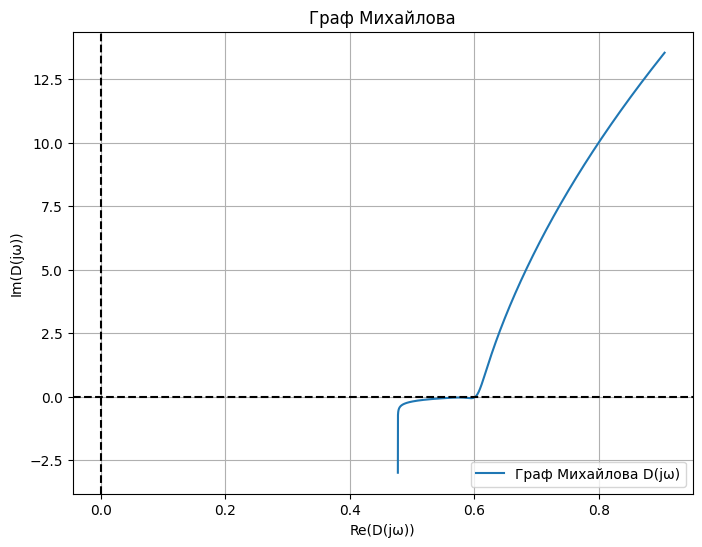

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Частотний вектор
w = np.arange(0, 1.5, 0.001)  # менші значення, бо великі степені швидко ростуть

# Передаточна функція D(jω)
D_jw = (w**4 + 3) + 1j*(w**77 - w**55 + w)  # комплексна форма

# Реальна та уявна частини
Re_D = np.log10(np.real(D_jw))
Im_D = np.log10(np.imag(D_jw))

# Побудова графа Михайлова
plt.figure(figsize=(8,6))
plt.plot(Re_D, Im_D, label='Граф Михайлова D(jω)')
plt.xlabel('Re(D(jω))')
plt.ylabel('Im(D(jω))')
plt.title('Граф Михайлова')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

# Банкомат

In [ ]:
import random

# Ініціалізація банкомату
SUPPORTED_CARD_TYPES = [1, 2]  # допустимі типи карток
SUPPORTED_CODES = [1234, 5678]  # допустимі коди

# Генеруємо випадковий баланс (гривні та копійки)
balance = random.randint(10000, 500000)

# Максимальна кількість спроб вводу коду
MAX_PIN_ATTEMPTS = 3

def atm():
    print("a0: Ласкаво просимо! Вставте картку.")

    # a1: Розпізнання картки
    card_type = int(input("a1: Введіть тип картки (ціле число): "))
    if card_type not in SUPPORTED_CARD_TYPES:
        print("a13: Цей тип картки не підтримується банкоматом.")
        return

    # a2: Запрошення до вводу коду
    pin_attempts = 0
    while pin_attempts < MAX_PIN_ATTEMPTS:
        pin = int(input("a2: Введіть код карти: "))
        # a3: Перевірка коду
        if pin in SUPPORTED_CODES:
            break
        else:
            pin_attempts += 1
            if pin_attempts < MAX_PIN_ATTEMPTS:
                print("a11: Код невірний, спробуйте ще раз.")
            else:
                print("a12: Код введено невірно. Картка заблокована.")
                return

    # a4: Меню операцій
    global balance, balance_hryvni, balance_kopecks
    while True:
        print("\na4: Виберіть операцію:")
        print("1 - Стан рахунку")
        print("2 - Зняття грошей")
        print("3 - Вихід")
        choice = input("Ваш вибір: ")

        match choice:
            case '1':
              balance_hryvni = balance // 100
              balance_kopecks = balance % 100
                # a5: Вивід стану рахунку
              print(f"a5: Ваш баланс: {balance_hryvni} грн {balance_kopecks} коп.")

            case '2':
                # a6: Запит суми для зняття
                withdraw_hryvni = int(input("a6: Введіть суму гривень для зняття: "))
                withdraw_kopecks = int(input("a6: Введіть суму копійок для зняття: "))
                withdraw_amount = withdraw_hryvni*100 + withdraw_kopecks

                # a7: Перевірка наявності грошей
                if withdraw_amount <= balance:
                    # a8: Видача готівки та корегування рахунку
                    balance -= withdraw_amount
                    balance_hryvni = int(balance)
                    balance_kopecks = int(round((balance - balance_hryvni) * 100))
                    print(f"a8: Видано: {withdraw_hryvni} грн {withdraw_kopecks} коп.")
                    print(f"a5: Новий баланс: {balance_hryvni} грн {balance_kopecks} коп.")
                else:
                    # a9: Недостатньо коштів
                    print("a9: Недостатньо коштів на рахунку.")

            case '3':
                # a10: Вихід
                print("a10: Дякуємо! До побачення!")
                break

            case _:
                print("Невірний вибір, спробуйте ще раз.")

# Запуск банкомату
atm()


a0: Ласкаво просимо! Вставте картку.
a1: Введіть тип картки (ціле число): 1
a2: Введіть код карти: 1234

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 3034 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 3000
Невірний вибір, спробуйте ще раз.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 3034 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 3034 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 2
a6: Введіть суму гривень для зняття: 3000
a6: Введіть суму копійок для зняття: 0
a8: Видано: 3000 грн 0 коп.
a5: Новий баланс: 3412 грн 0 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 34 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 2
a6: Введіть 

# Передатні функції

In [31]:
from scipy.signal import tf2zpk
import numpy as np

def is_stable(poles):
  stability = all(p.real < 0 for p in poles)
  if stability:
      return("Система стійка")
  else:
      return("Система нестійка")

tf2zpk([1, -1, 0, 1], [1, 0, 0, 1, 3])

num = [1, -1, 0, 1]
den = [1, 0, 0, 1, 3]

zeros, poles, gain = tf2zpk(num, den)

print("Нулі:", zeros)
print("Полюси:", poles)
print("Коефіцієнт підсилення:", gain)



Ku = 0.1
while Ku < 10000:
    num_closed = [Ku*x for x in num]      # Ku*N(p)
    den_closed = np.polyadd(den, num_closed) # D(p) + Ku*N(p)

    zeros_c, poles_c, gain_c = tf2zpk(num_closed, den_closed)
    #print(is_stable(poles))
    if all(p.real < 0 for p in poles_c):
        print("Система стала стійкою при Ku =", Ku)
        break
    Ku += 0.1
   # print(gain_c)

Нулі: [ 0.87743883+0.74486177j  0.87743883-0.74486177j -0.75487767+0.j        ]
Полюси: [ 0.93608757+1.06926562j  0.93608757-1.06926562j -0.93608757+0.78050682j
 -0.93608757-0.78050682j]
Коефіцієнт підсилення: 1.0
